## Sections of Notebook
1. [Importing Libraries](#Importing-Libraries)
2. [Importing datasets](#Importing-datasets)
3. [EDA](#EDA)
4. [Data Cleaning](#Data-Cleaning)
5. [Training Models](#Training-Models)

## Problem Statement
This project will start by examining the features that the dataset provides. Cleaning and feature engineering will be done for the data, and some visualisation will be plotted to observe trends and possible outliers. The type of model to predict sale prices of house would be a linear regression model in conjunct with other regularised linear regression model such as Lasso and Ridge. The success of the prediction will be done using R^2 score.

The target audience for this project is aimed at buyers who are planning to get a house but has a hard time offering a proper bid price, in which he/she will not overpay for a certain type of house ([*source*](https://www.businessinsider.com/the-biggest-signs-youre-overpaying-on-a-house-2019-7#:~:text=More%20than%2039%20million%20Americans,1.04%25%20for%20the%20same%20house.)). The important features extracted from the regularised models can also be used for sellers who wants the maximum value when selling their house. With a bid from the buyer and an ask from the seller, the transaction only goes through when both bid and ask matches. Therefore, this machine learning aims to provide better price signals for both the buyers and sellers. The primary stakeholder would be buyers and sellers of houses located in Ames, Iowa. The secondary stakeholder could be online real estate sites like [*Zillow*](https://www.zillow.com/) where they can use the model to give a recommendation on what price the sellers could list their houses for.

## Importing Libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Lasso, LassoCV, RidgeCV, ElasticNetCV
from sklearn.metrics import r2_score,mean_squared_error

## Importing datasets

In [2]:
df = pd.read_csv("datasets/train.csv")

In [3]:
pd.set_option('display.max_columns', None)
df.head()

Id        PID  MS SubClass MS Zoning  Lot Frontage  Lot Area Street Alley  \
0  109  533352170           60        RL           NaN     13517   Pave   NaN   
1  544  531379050           60        RL          43.0     11492   Pave   NaN   
2  153  535304180           20        RL          68.0      7922   Pave   NaN   
3  318  916386060           60        RL          73.0      9802   Pave   NaN   
4  255  906425045           50        RL          82.0     14235   Pave   NaN   

  Lot Shape Land Contour Utilities Lot Config Land Slope Neighborhood  \
0       IR1          Lvl    AllPub    CulDSac        Gtl       Sawyer   
1       IR1          Lvl    AllPub    CulDSac        Gtl      SawyerW   
2       Reg          Lvl    AllPub     Inside        Gtl        NAmes   
3       Reg          Lvl    AllPub     Inside        Gtl       Timber   
4       IR1          Lvl    AllPub     Inside        Gtl      SawyerW   

  Condition 1 Condition 2 Bldg Type House Style  Overall Qual  Overall Cond  \
0        RRAe        Norm      1Fam      2Story             6             8   
1        Norm        Norm      1Fam      2Story             7             5   
2        Norm        Norm      1Fam      1Story             5             7   
3        Norm        Norm      1Fam      2Story             5             5   
4        Norm        Norm      1Fam      1.5Fin             6             8   

   Year Built  Year Remod/Add Roof Style Roof Matl Exterior 1st Exterior 2nd  \
0        1976            2005      Gable   CompShg      HdBoard      Plywood   
1        1996            1997      Gable   CompShg      VinylSd      VinylSd   
2        1953            2007      Gable   CompShg      VinylSd      VinylSd   
3        2006            2007      Gable   CompShg      VinylSd      VinylSd   
4        1900            1993      Gable   CompShg      Wd Sdng      Plywood   

  Mas Vnr Type  Mas Vnr Area Exter Qual Exter Cond Foundation Bsmt Qual  \
0      BrkFace         289.0         Gd         TA     CBlock        TA   
1      BrkFace         132.0         Gd         TA      PConc        Gd   
2         None           0.0         TA         Gd     CBlock        TA   
3         None           0.0         TA         TA      PConc        Gd   
4         None           0.0         TA         TA      PConc        Fa   

  Bsmt Cond Bsmt Exposure BsmtFin Type 1  BsmtFin SF 1 BsmtFin Type 2  \
0        TA            No            GLQ         533.0            Unf   
1        TA            No            GLQ         637.0            Unf   
2        TA            No            GLQ         731.0            Unf   
3        TA            No            Unf           0.0            Unf   
4        Gd            No            Unf           0.0            Unf   

   BsmtFin SF 2  Bsmt Unf SF  Total Bsmt SF Heating Heating QC Central Air  \
0           0.0        192.0          725.0    GasA         Ex           Y   
1           0.0        276.0          913.0    GasA         Ex           Y   
2           0.0        326.0         1057.0    GasA         TA           Y   
3           0.0        384.0          384.0    GasA         Gd           Y   
4           0.0        676.0          676.0    GasA         TA           Y   

  Electrical  1st Flr SF  2nd Flr SF  Low Qual Fin SF  Gr Liv Area  \
0      SBrkr         725         754                0         1479   
1      SBrkr         913        1209                0         2122   
2      SBrkr        1057           0                0         1057   
3      SBrkr         744         700                0         1444   
4      SBrkr         831         614                0         1445   

   Bsmt Full Bath  Bsmt Half Bath  Full Bath  Half Bath  Bedroom AbvGr  \
0             0.0             0.0          2          1              3   
1             1.0             0.0          2          1              4   
2             1.0             0.0          1          0              3   
3             0.0             0.0          2  

In [4]:
df.columns

Index(['Id', 'PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area',
       'Street', 'Alley', 'Lot Shape', 'Land Contour', 'Utilities',
       'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Roof Style',
       'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type',
       'Mas Vnr Area', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual',
       'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1',
       'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       'Heating', 'Heating QC', 'Central Air', 'Electrical', '1st Flr SF',
       '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath',
       'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr',
       'Kitchen AbvGr', 'Kitchen Qual', 'TotRms AbvGrd', 'Functional',
       'Fireplaces', 'Fireplace Qu', 'Garage Type', 'Garage Yr Blt',
       'G

## EDA

In [5]:
# Looking at the statistical summary of data set
df.describe()

Id           PID  MS SubClass  Lot Frontage       Lot Area  \
count  2051.000000  2.051000e+03  2051.000000   1721.000000    2051.000000   
mean   1474.033642  7.135900e+08    57.008776     69.055200   10065.208191   
std     843.980841  1.886918e+08    42.824223     23.260653    6742.488909   
min       1.000000  5.263011e+08    20.000000     21.000000    1300.000000   
25%     753.500000  5.284581e+08    20.000000     58.000000    7500.000000   
50%    1486.000000  5.354532e+08    50.000000     68.000000    9430.000000   
75%    2198.000000  9.071801e+08    70.000000     80.000000   11513.500000   
max    2930.000000  9.241520e+08   190.000000    313.000000  159000.000000   

       Overall Qual  Overall Cond   Year Built  Year Remod/Add  Mas Vnr Area  \
count   2051.000000   2051.000000  2051.000000     2051.000000   2029.000000   
mean       6.112140      5.562165  1971.708922     1984.190151     99.695909   
std        1.426271      1.104497    30.177889       21.036250    174.963129   
min        1.000000      1.000000  1872.000000     1950.000000      0.000000   
25%        5.000000      5.000000  1953.500000     1964.500000      0.000000   
50%        6.000000      5.000000  1974.000000     1993.000000      0.000000   
75%        7.000000      6.000000  2001.000000     2004.000000    161.000000   
max       10.000000      9.000000  2010.000000     2010.000000   1600.000000   

       BsmtFin SF 1  BsmtFin SF 2  Bsmt Unf SF  Total Bsmt SF   1st Flr SF  \
count   2050.000000   2050.000000  2050.000000    2050.000000  2051.000000   
mean     442.300488     47.959024   567.728293    1057.987805  1164.488055   
std      461.204124    165.000901   444.954786     449.410704   396.446923   
min        0.000000      0.000000     0.000000       0.000000   334.000000   
25%        0.000000      0.000000   220.000000     793.000000   879.500000   
50%      368.000000      0.000000   474.500000     994.500000  1093.000000   
75%      733.750000      0.000000   811.000000    1318.750000  1405.000000   
max     5644.000000   1474.000000  2336.000000    6110.000000  5095.000000   

        2nd Flr SF  Low Qual Fin SF  Gr Liv Area  Bsmt Full Bath  \
count  2051.000000      2051.000000  2051.000000     2049.000000   
mean    329.329108         5.512921  1499.330083        0.427526   
std     425.671046        51.068870   500.447829        0.522673   
min       0.000000         0.000000   334.000000        0.000000   
25%       0.000000         0.000000  1129.000000        0.000000   
50%       0.000000         0.000000  1444.000000        0.000000   
75%     692.500000         0.000000  1728.500000        1.000000   
max    1862.000000      1064.000000  5642.000000        3.000000   

       Bsmt Half Bath    Full Bath    Half Bath  Bedroom AbvGr  Kitchen AbvGr  \
count     2049.000000  2051.000000  2051.000000    2051.000000    2051.000000   
mean         0.063446     1.577279     0.371039       2.843491       1.042906   
std          0.251705     0.549279     0.501043       0.826618       0.209790   
min          0.000000     0.000000     0.000000       0.000000       0.000000   
25%          0.000000     1.000000     0.000000       2.000000       1.000000   
50%          0.000000     2.000000     0.000000       3.000000       1.000000   
75%          0.000000     2.000000     1.000000       3.000000       1.000000   
max          2.000000     4.000000     2.000000       8.000000       3.000000   

       TotRms AbvGrd   Fireplaces  Garage Yr Blt  Garage Cars  Garage Area  \
count    2051.000000  2051.000000    1937.000000  2050.000000  2050.000000   
mean        6.435885     0.590931    1978.707796     1.776585   473.671707   
std         1.560225     0.638516      25.441094     0.764537   215.934561   
min         2.000000     0.000000    1895.000000     0.000000     0.000000   
25%         5.000000     0.000000    1961.000000     1.000000   319.000000   
50%         6.000000     1.000000    1980.000000     2.000000   480.000000   


In [6]:
#Checking if the building class correlates with higher sale prices
subclass = df.groupby(["MS SubClass"]).mean().SalePrice.reset_index()
subclass.sort_values('SalePrice', ascending=False)

MS SubClass      SalePrice
5            60  239225.769036
11          120  211813.613636
7            75  204875.000000
0            20  189305.488312
8            80  169569.825581
9            85  154398.214286
6            70  153354.455556
12          150  148400.000000
10           90  139296.333333
13          160  138452.215909
4            50  137270.000000
15          190  124310.326087
2            40  119125.000000
3            45  116372.727273
14          180  109672.727273
1            30   94936.346535

In [7]:
df["Low Qual Fin SF"].value_counts()

0       2018
80         3
205        2
512        1
362        1
53         1
360        1
384        1
156        1
436        1
259        1
479        1
140        1
397        1
514        1
144        1
697        1
114        1
390        1
234        1
572        1
312        1
120        1
515        1
1064       1
108        1
473        1
371        1
513        1
528        1
450        1
Name: Low Qual Fin SF, dtype: int64

Very sparse data for the Low quality finished square feet. *Noted for feature selection*

In [8]:
%%html
<style>
table {margin-left: 0 !important;}
</style>

<u>Top 3 types of Subclass with the highest mean SalePrice<u>

| SubClass                                                | SalePrice Mean ($) |
|---------------------------------------------------------|----------------|
| 2-STORY 1946 and NEWER                                  | 239225.76      |
| 1-STORY PUD (Planned Unit Development) - 1946 and NEWER | 211813.61      |
| 2-1/2 STORY ALL AGES                                    | 204875         |
    


<u>Top 3 types of Subclass with the Lowest mean SalePrice<u>

| SubClass                                | SalePrice Mean ($) |
|-----------------------------------------|----------------|
| 1-1/2 STORY  UNFINISHED ALL AGES       | 116372.72     |
| PUD  MULTILEVEL  INCL SPLIT LEV/FOYER | 109672.72     |
| 1-STORY 1945 and OLDER                  | 94936.34      |


## Data Cleaning

In [9]:
pd.set_option('display.max_columns', None)
df.head(7)

Id        PID  MS SubClass MS Zoning  Lot Frontage  Lot Area Street  \
0   109  533352170           60        RL           NaN     13517   Pave   
1   544  531379050           60        RL          43.0     11492   Pave   
2   153  535304180           20        RL          68.0      7922   Pave   
3   318  916386060           60        RL          73.0      9802   Pave   
4   255  906425045           50        RL          82.0     14235   Pave   
5   138  535126040           20        RL         137.0     16492   Pave   
6  2827  908186070          180        RM          35.0      3675   Pave   

  Alley Lot Shape Land Contour Utilities Lot Config Land Slope Neighborhood  \
0   NaN       IR1          Lvl    AllPub    CulDSac        Gtl       Sawyer   
1   NaN       IR1          Lvl    AllPub    CulDSac        Gtl      SawyerW   
2   NaN       Reg          Lvl    AllPub     Inside        Gtl        NAmes   
3   NaN       Reg          Lvl    AllPub     Inside        Gtl       Timber   
4   NaN       IR1          Lvl    AllPub     Inside        Gtl      SawyerW   
5   NaN       IR1          Lvl    AllPub     Corner        Gtl        NAmes   
6   NaN       Reg          Lvl    AllPub     Inside        Gtl      Edwards   

  Condition 1 Condition 2 Bldg Type House Style  Overall Qual  Overall Cond  \
0        RRAe        Norm      1Fam      2Story             6             8   
1        Norm        Norm      1Fam      2Story             7             5   
2        Norm        Norm      1Fam      1Story             5             7   
3        Norm        Norm      1Fam      2Story             5             5   
4        Norm        Norm      1Fam      1.5Fin             6             8   
5        PosA        Norm      1Fam      1Story             6             6   
6        Norm        Norm    TwnhsE      SFoyer             6             5   

   Year Built  Year Remod/Add Roof Style Roof Matl Exterior 1st Exterior 2nd  \
0        1976            2005      Gable   CompShg      HdBoard      Plywood   
1        1996            1997      Gable   CompShg      VinylSd      VinylSd   
2        1953            2007      Gable   CompShg      VinylSd      VinylSd   
3        2006            2007      Gable   CompShg      VinylSd      VinylSd   
4        1900            1993      Gable   CompShg      Wd Sdng      Plywood   
5        1966            2002      Gable   CompShg      BrkFace      Plywood   
6        2005            2006      Gable   CompShg      VinylSd      VinylSd   

  Mas Vnr Type  Mas Vnr Area Exter Qual Exter Cond Foundation Bsmt Qual  \
0      BrkFace         289.0         Gd         TA     CBlock        TA   
1      BrkFace         132.0         Gd         TA      PConc        Gd   
2         None           0.0         TA         Gd     CBlock        TA   
3         None           0.0         TA         TA      PConc        Gd   
4         None           0.0         TA         TA      PConc        Fa   
5         None           0.0         Gd         TA     CBlock        TA   
6      BrkFace          82.0         TA         TA      PConc        Gd   

  Bsmt Cond Bsmt Exposure BsmtFin Type 1  BsmtFin SF 1 BsmtFin Type 2  \
0        TA            No            GLQ         533.0            Unf   
1        TA            No            GLQ         637.0            Unf   
2        TA            No            GLQ         731.0            Unf   
3        TA            No            Unf           0.0            Unf   
4        Gd            No            Unf           0.0            Unf   
5        TA            No            ALQ         247.0            Rec   
6        TA            Gd            GLQ         547.0            Unf   

   BsmtFin SF 2  Bsmt Unf SF  Total Bsmt SF Heating Heating QC Central Air  \
0           0.0        192.0          725.0    GasA         Ex           Y   
1           0.0        276.0          913.0    GasA         Ex           Y   
2           0.0        326.0         1057.0    GasA         TA       

In [10]:
#Quick filter for categorical columns
categoricalcolumns = [col for col in df.columns if df[col].nunique() <17 ]
#Refining Categorical Columns
categoricalcolumns.append("Neighborhood")
#Features that got filtered which should not be inside categorical
notcat = ['Overall Cond','Overall Qual','Pool Area','Yr Sold','Exter Qual', 'Exter Cond','Garage Cars']
categoricalcolumns = [feature for feature in categoricalcolumns if feature not in notcat]
print(f'The number of categorial columns are \033[1m{len(categoricalcolumns)}\033[0m and they are \n {categoricalcolumns}')
print()
print([i  for i in df.columns if i not in categoricalcolumns])

The number of categorial columns are 50 and they are 
 ['MS SubClass', 'MS Zoning', 'Street', 'Alley', 'Lot Shape', 'Land Contour', 'Utilities', 'Lot Config', 'Land Slope', 'Condition 1', 'Condition 2', 'Bldg Type', 'House Style', 'Roof Style', 'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type', 'Foundation', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin Type 2', 'Heating', 'Heating QC', 'Central Air', 'Electrical', 'Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr', 'Kitchen AbvGr', 'Kitchen Qual', 'TotRms AbvGrd', 'Functional', 'Fireplaces', 'Fireplace Qu', 'Garage Type', 'Garage Finish', 'Garage Qual', 'Garage Cond', 'Paved Drive', 'Pool QC', 'Fence', 'Misc Feature', 'Mo Sold', 'Sale Type', 'Neighborhood']

['Id', 'PID', 'Lot Frontage', 'Lot Area', 'Overall Qual', 'Overall Cond', 'Year Built', 'Year Remod/Add', 'Mas Vnr Area', 'Exter Qual', 'Exter Cond', 'BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF', '1st F

### Assumptions made
- Model that will be trained and predicted are on Ames Iowa properties and assumed that the dataset covers most streets and zonings.

In [11]:
#Preparing get dummies with the test data set
test = pd.read_csv("datasets/test.csv")
alldata = pd.concat([df,test], axis = 0)

In [12]:
#Getting dummies columns and imputing NaN values with 0
def dataupdate(df):
    df = df.replace({"Exter Qual": {"Ex": 5, "Gd": 4, "TA": 3, "Fa": 2, "Po": 1}})
    df = df.replace({"Exter Cond": {"Ex": 5, "Gd": 4, "TA": 3, "Fa": 2, "Po": 1}})
    return df

def dummify(df):
    df = pd.get_dummies(df,columns=categoricalcolumns,drop_first = True)
    df = df.fillna(0)
    return df 
alldata = dataupdate(alldata)
alldata = dummify(alldata)
testdata = alldata.iloc[-test.shape[0]:]
newdf = alldata.iloc[:df.shape[0]]

In [13]:
#Percentage of missing data
percentnil = round(df.isna().sum()/len(df),4)* 100 
percentnil.sort_values(ascending=False).head(15)

Pool QC           99.56
Misc Feature      96.83
Alley             93.17
Fence             80.50
Fireplace Qu      48.76
Lot Frontage      16.09
Garage Finish      5.56
Garage Qual        5.56
Garage Yr Blt      5.56
Garage Cond        5.56
Garage Type        5.51
Bsmt Exposure      2.83
BsmtFin Type 2     2.73
BsmtFin Type 1     2.68
Bsmt Cond          2.68
dtype: float64

## Visualisation

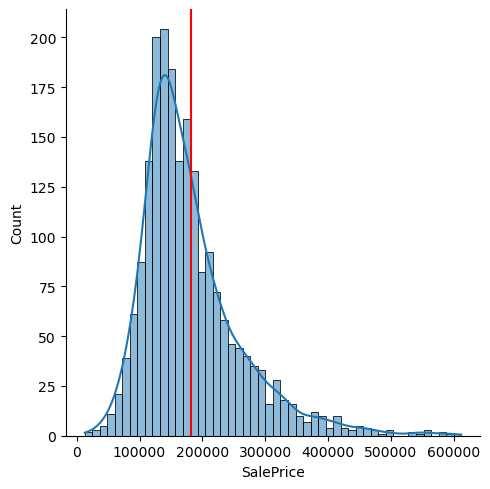

In [14]:
#Plotting distribution of Sale Prices
sns.displot(df.SalePrice, kde = True, bins = 50)
plt.axvline(x=df.SalePrice.mean(),
            color='red')

### Sale price
The Sale price follows a normal distribution that is skewed to the left, and we can observe from the distribution plot that most of the house are selling below the mean price

In [15]:
house_bellow_mean = df[df.SalePrice < df.SalePrice.mean()]
print(f'The number of house selling bellow the mean price is {house_bellow_mean.shape[0]} and the number of house selling above the mean is {df.shape[0]-house_bellow_mean.shape[0]}.')

The number of house selling bellow the mean price is 1264 and the number of house selling above the mean is 787.


In [16]:
print(f'Skew of Sale price: {df.SalePrice.skew()}.')

Skew of Sale price: 1.5575514385863427.


In [17]:
plt.subplots(figsize=(10, 9))
with sns.axes_style("white"):
    sns.heatmap(df.corr(),vmin = -1, vmax = 1, linewidths = .5, cmap='coolwarm')

### Findings for heatmap
<u>Positive Correlation<u>
- Garage Cars and Garage Area are highly correlated which make sense as having a bigger area would allow you to park more cars
- Sale Price and Overall Conditions of the house are high correlated. *Noted for feature Selection*
    
<u>Negative Correlation</u>
- <b>Overall Conditions</b> and <b>Year Built</b> are highly correlated, as conditions deteriorate more for older houses
- Id and Yr sold are correlate probably due to how the Id is generated as the houses are being sold

In [18]:
sns.countplot(x = "Yr Sold", data = df)

<AxesSubplot:xlabel='Yr Sold', ylabel='count'>

Houses are mostly sold in the late 2000s

In [19]:
sns.boxplot(data = df, x = "Overall Qual", y = "SalePrice")

<AxesSubplot:xlabel='Overall Qual', ylabel='SalePrice'>

The sale prices increase as the overall quality of the house improves.

In [20]:
plt.figure(figsize=(23, 8))
sns.boxplot(data = df, x = "Neighborhood", y = "SalePrice")

<AxesSubplot:xlabel='Neighborhood', ylabel='SalePrice'>

StoneBr and NridgHt is fetching a higher median price as compared to the other neighborhooods

In [21]:
sns.regplot(data = df, x = "Gr Liv Area", y = "SalePrice")

<AxesSubplot:xlabel='Gr Liv Area', ylabel='SalePrice'>

Ground living area seems to have a correlation with the sale prices as well. 2 outliers can be observed on the far right of the graph

In [22]:
sns.regplot(data = df, x = "Total Bsmt SF", y = "SalePrice")

<AxesSubplot:xlabel='Total Bsmt SF', ylabel='SalePrice'>

Similarly, the total basement square foot area is correlated with sale price as you would pay more for a bigger house. There are also 2 outliers on the far right

In [23]:
yearcompare = df[["SalePrice","Year Built"]].groupby("Year Built").mean().reset_index()
sns.lineplot(data = yearcompare, y = "SalePrice", x = "Year Built")

<AxesSubplot:xlabel='Total Bsmt SF', ylabel='SalePrice'>

Newer houses are fetching higher prices as compared to those built before, there was a spike between 1880-1920 which we will explore more into. 

In [24]:
df[(df["Year Built"]> 1880) & (df["Year Built"]<1900)].sort_values(by = ["Year Built","SalePrice"])

Id        PID  MS SubClass MS Zoning  Lot Frontage  Lot Area Street  \
394    190  902402250          190        RM          60.0     11340   Pave   
501    666  535383120           30        RL          60.0     10800   Pave   
1204  1299  902136110           50        RM          44.0      5914   Pave   
918    724  902405100           50        RM          98.0      8820   Pave   
1318  2002  902408080           70        RM          60.0     10800   Pave   
175   1323  902405070           70        RM          60.0     10800   Pave   
1035  2667  902400110           75        RM          90.0     22950   Pave   
1141  1321  902401120           75        RM          75.0     13500   Pave   
1793  1555  911102090           70   C (all)          60.0      5280   Pave   
28    2243  911103060          190   C (all)          75.0      8250   Pave   
457   1951  535379110           70        RL          60.0     10800   Pave   
410    308  911204100           30   C (all)          66.0      8712   Grvl   
1359   716  902325070           75        RM          90.0      8100   Pave   

     Alley Lot Shape Land Contour Utilities Lot Config Land Slope  \
394    NaN       Reg          Lvl    AllPub     Inside        Gtl   
501   Grvl       Reg          Lvl    AllPub     Corner        Gtl   
1204  Grvl       Reg          Lvl    AllPub     Inside        Gtl   
918    NaN       Reg          Lvl    AllPub     Corner        Gtl   
1318  Grvl       Reg          Bnk    AllPub     Inside        Gtl   
175    NaN       Reg          Lvl    AllPub     Inside        Gtl   
1035   NaN       IR2          Lvl    AllPub     Inside        Gtl   
1141   NaN       Reg          Lvl    AllPub     Inside        Gtl   
1793   NaN       Reg          Lvl    AllPub     Corner        Gtl   
28     NaN       Reg          Lvl    AllPub     Inside        Gtl   
457   Grvl       Reg          Lvl    AllPub     Inside        Gtl   
410    NaN       Reg          Lvl    AllPub     Corner        Gtl   
1359   NaN       Reg          Lvl    AllPub     Corner        Gtl   

     Neighborhood Condition 1 Condition 2 Bldg Type House Style  Overall Qual  \
394       OldTown        Norm        Norm    2fmCon      2Story             4   
501       OldTown        Norm        Norm      1Fam      1Story             3   
1204      OldTown        Norm        Norm      1Fam      1.5Fin             5   
918       OldTown        Norm        Norm      1Fam      1.5Fin             5   
1318      OldTown        Norm        Norm      1Fam      2Story             7   
175       OldTown        Norm        Norm      1Fam      2Story             7   
1035      OldTown      Artery        Norm      1Fam      2.5Fin            10   
1141      OldTown      Artery        PosA      1Fam      2.5Unf            10   
1793       IDOTRR       Feedr        Norm      1Fam      2Story             4   
28         IDOTRR       Feedr        Norm    2fmCon      2Story             5   
457       OldTown        Norm        Norm      1Fam      2Story             5   
410        IDOTRR        Norm        Norm      1Fam      1Story             4   
1359      OldTown        Norm        Norm      1Fam      2.5Unf             5   

      Overall Cond  Year Built  Year Remod/Add Roof Style Roof Matl  \
394              6        1885            1950      Gable   CompShg   
501              5        1890            1998      Gable   CompShg   
1204             9        1890            1996      Gable   CompShg   
918              6        1890            1996        Hip   CompShg   
1318             8        1890            1998      Gable   CompShg   
175              7        1890            1999      Gable   CompShg   
1035             9        1892            1993      Gable   WdShngl   
1141             9        1893            2000      Gable   CompShg   
1793             7        1895            1950      Gable   CompShg   
28               6        1895            2006      Gable   CompShg   
457              9

In [25]:
df[df["Yr Sold"]<df["Year Remod/Add"]]

Id        PID  MS SubClass MS Zoning  Lot Frontage  Lot Area Street  \
1719  1703  528120010           60        RL         134.0     16659   Pave   
1885  2181  908154195           20        RL         128.0     39290   Pave   

     Alley Lot Shape Land Contour Utilities Lot Config Land Slope  \
1719   NaN       IR1          Lvl    AllPub     Corner        Gtl   
1885   NaN       IR1          Bnk    AllPub     Inside        Gtl   

     Neighborhood Condition 1 Condition 2 Bldg Type House Style  Overall Qual  \
1719      NridgHt        Norm        Norm      1Fam      2Story             8   
1885      Edwards        Norm        Norm      1Fam      1Story            10   

      Overall Cond  Year Built  Year Remod/Add Roof Style Roof Matl  \
1719             5        2007            2008      Gable   CompShg   
1885             5        2008            2009        Hip   CompShg   

     Exterior 1st Exterior 2nd Mas Vnr Type  Mas Vnr Area Exter Qual  \
1719      VinylSd      VinylSd         None           0.0         Gd   
1885      CemntBd      CmentBd        Stone        1224.0         Ex   

     Exter Cond Foundation Bsmt Qual Bsmt Cond Bsmt Exposure BsmtFin Type 1  \
1719         TA      PConc        Gd        TA            No            Unf   
1885         TA      PConc        Ex        TA            Gd            GLQ   

      BsmtFin SF 1 BsmtFin Type 2  BsmtFin SF 2  Bsmt Unf SF  Total Bsmt SF  \
1719           0.0            Unf           0.0       1582.0         1582.0   
1885        4010.0            Unf           0.0       1085.0         5095.0   

     Heating Heating QC Central Air Electrical  1st Flr SF  2nd Flr SF  \
1719    GasA         Ex           Y      SBrkr        1582         570   
1885    GasA         Ex           Y      SBrkr        5095           0   

      Low Qual Fin SF  Gr Liv Area  Bsmt Full Bath  Bsmt Half Bath  Full Bath  \
1719                0         2152             0.0             0.0          2   
1885                0         5095             1.0             1.0          2   

      Half Bath  Bedroom AbvGr  Kitchen AbvGr Kitchen Qual  TotRms AbvGrd  \
1719          1              3              1           Gd              7   
1885          1              2              1           Ex             15   

     Functional  Fireplaces Fireplace Qu Garage Type  Garage Yr Blt  \
1719        Typ           1           Gd      Detchd         2007.0   
1885        Typ           2           Gd      Attchd         2008.0   

     Garage Finish  Garage Cars  Garage Area Garage Qual Garage Cond  \
1719           Unf          2.0        728.0          TA          TA   
1885           Fin          3.0       1154.0          TA          TA   

     Paved Drive  Wood Deck SF  Open Porch SF  Enclosed Porch  3Ssn Porch  \
1719           Y             0            368               0           0   
1885           Y           546            484               0           0   

      Screen Porch  Pool Area Pool QC Fence Misc Feature  Misc Val  Mo Sold  \
1719             0          0     NaN   NaN          NaN         0        6   
1885             0          0     NaN   NaN         Elev     17000       10   

      Yr Sold Sale Type  SalePrice  
1719     2007       New     260116  
1885     2007       New     183850

For the house that got sold at $475k, this data point was not removed as it is justifiable by the size of the house.

## Feature Engineering + Post visualisation processing
After examining the correlations of the features, this is an attempt at aggregating new features and removing outliers

In [26]:
#Dropping the 2 outliers idenitified in Visualisation
newdf = newdf[newdf["Gr Liv Area"]<4000]

In [27]:
def featureeng(df):
    df["TotalSF"] = df["Gr Liv Area"] + df["Total Bsmt SF"] #Total area including ground living area and basement
    df["AgeOfHouse"] = df["Yr Sold"] - df["Year Built"] #Calculating the age of the house since it was built
    df["weightedcondition"] = df["Overall Cond"] * np.exp(-(df["Yr Sold"]- df["Year Remod/Add"])) #Exponential decay of overall conditions as there were no explanatinon on when/how the features were collected 
    return df
newdf = featureeng(newdf)

In [28]:
corr = newdf.corr()
print(corr[abs(corr.SalePrice)>0.5].SalePrice.sort_values())

AgeOfHouse         -0.572441
Kitchen Qual_TA    -0.541265
Full Bath_1        -0.520328
Mas Vnr Area        0.511273
Foundation_PConc    0.529500
Year Remod/Add      0.550872
Year Built          0.572405
Garage Cars         0.648227
1st Flr SF          0.648252
Garage Area         0.655097
Total Bsmt SF       0.665116
Exter Qual          0.715048
Gr Liv Area         0.719463
Overall Qual        0.803462
TotalSF             0.825818
SalePrice           1.000000
Name: SalePrice, dtype: float64


### Scaling the data

In [29]:
X = newdf.drop(columns= ["Id", "PID","SalePrice"])
y = newdf.SalePrice

In [30]:
def scalingdata(df):
    ss = StandardScaler()
    Xs = ss.fit_transform(df)
    return Xs
Xs = scalingdata(X)

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1)

In [32]:
ss = StandardScaler()
ss.fit(X_train)
X_train_ss = ss.transform(X_train)
X_test_ss = ss.transform(X_test)

## Training Models

### Baseline Model using mean

In [33]:
trainmeandf = pd.Series(np.ones(y_train.shape)*y.mean())

In [34]:
testmeandf = pd.Series(np.ones(y_test.shape)*y.mean())

In [35]:
y_test

403     177500.0
351      88750.0
675     207500.0
102     290000.0
181     149700.0
          ...   
1993    138887.0
1633    261329.0
1080    215000.0
434     240000.0
80      114000.0
Name: SalePrice, Length: 513, dtype: float64

In [36]:
print(" Mean ".center(18, "="))
print(r2_score(y_train,trainmeandf))
print(r2_score(y_test,testmeandf))

====== Mean ======
-3.512277132688979e-06
-3.1862616759692486e-05


In [37]:
#Getting MSE 
mean_squared_error(y_test,testmeandf)

6229257935.533986

### Linear Regression 

In [38]:
lr = LinearRegression()

In [39]:
lr.fit(X_train_ss, y_train)

LinearRegression()

In [40]:
cross_val_score(lr, X_train_ss, y_train).mean()

-2.186862430610645e+25

In [41]:
trainr2score = {}
testr2score = {}

In [42]:
print(" Linear ".center(18, "="))
print(lr.score(X_train_ss, y_train))
print(lr.score(X_test_ss, y_test))
trainr2score["Linear Regression"] = lr.score(X_train_ss, y_train)


===== Linear =====
0.9509531480469114
-5.63330113211727e+24


In [43]:
mean_squared_error(y_test, lr.predict(X_test_ss))

3.5090167715928135e+34

Considering the scores from our **baseline model**, the linear regression seemingly did well on the train data but it does not outperform the score for our mean baseline model. Severe overfitting by linear regression model since there are many features. We consider the linear regression model to be our <b>baseline score</b> as it does not do well when it comes to having a large number of features and would require regularised models in order to do feature selection.

### RidgeCV Regression

In [44]:
r_alphas = np.logspace(0,5,200)
ridgecv = RidgeCV(alphas = r_alphas, scoring = "r2", cv =5).fit(X_train_ss,y_train)

In [45]:
ridgecv.alpha_

162.5755666443795

In [46]:
print(" Ridge ".center(18, "="))
print(ridgecv.score(X_train_ss,y_train))
print(ridgecv.score(X_test_ss,y_test))
trainr2score["Ridge"] = ridgecv.score(X_train_ss,y_train)
testr2score["Ridge"] = ridgecv.score(X_test_ss,y_test)

===== Ridge ======
0.9464695394598727
0.9132942160620224


In [47]:
#Finding MSE
mean_squared_error(y_test, ridgecv.predict(X_test_ss))

540095483.7969282

Based on the R2 score for Ridge regression, we can see massive improvement from the baseline model, especially for the test set. Furthermore, the mse acheived from ridge is much small than that of the baseline and linear regression model.

In [48]:
#Finding the coeff for different features
coeff_columns = newdf.drop(columns= ["Id", "PID","SalePrice"]).columns
ridgecoef = pd.Series(ridgecv.coef_, index = coeff_columns)
ridgecoef = ridgecoef.sort_values(ascending = False)

In [49]:
impfeatures = pd.concat([ridgecoef.head(10),ridgecoef.tail(10)])
impfeatures.plot(kind = "barh")

<AxesSubplot:xlabel='Total Bsmt SF', ylabel='SalePrice'>

### LassoCV Regression

In [50]:
lassocv = LassoCV(n_alphas = 1000, cv = 5, max_iter = 50000).fit(X_train_ss,y_train)

In [51]:
lassocv.alpha_

449.4150390583695

In [52]:
print(" Lasso ".center(18, "="))
print(lassocv.score(X_train_ss,y_train))
print(lassocv.score(X_test_ss,y_test))
trainr2score["Lasso"] = lassocv.score(X_train_ss,y_train)
testr2score["Lasso"] = lassocv.score(X_test_ss,y_test)

===== Lasso ======
0.9419217633054142
0.9119966529950376


In [53]:
mean_squared_error(y_test, lassocv.predict(X_test_ss))

548178081.2960929

We could see very similar results for the Lasso regression compared to ridge as both of them do a great job in selecting features for prediction. The R2 score and MSE are close to Ridge's, with Ridge performing sightly better than Lasso.

In [54]:
lassocoef = pd.Series(lassocv.coef_, index = coeff_columns,name = "lassocoef")
lassocoef = lassocoef.sort_values(ascending = False)

In [55]:
#Percentage of features that got zeroed out
print(f'The percentage of the features that got zeroed out is %{round(len(lassocoef[lassocoef==0])/len(lassocoef)*100,2)}.')

The percentage of the features that got zeroed out is %54.55.


In [56]:
list(lassocoef[lassocoef==0].index)[:10]

['Condition 1_Feedr',
 'TotRms AbvGrd_9',
 'MS SubClass_180',
 'TotRms AbvGrd_13',
 'TotRms AbvGrd_14',
 'TotRms AbvGrd_15',
 'Functional_Maj2',
 'Fireplaces_3',
 'Functional_Min1',
 'Functional_Min2']

In [57]:
impfeatures = pd.concat([lassocoef.head(10),lassocoef.tail(10)])
impfeatures.plot(kind = "barh")

<AxesSubplot:xlabel='Total Bsmt SF', ylabel='SalePrice'>

In [58]:
#Finding out out many features were dropped
print(f'The number of features that were dropped is {len(lassocoef[lassocoef == 0])}, the total number of coefficients is {len(lassocoef)}. The percentage of dropped columns is {len(lassocoef[lassocoef == 0])/len(lassocoef)}')

The number of features that were dropped is 168, the total number of coefficients is 308. The percentage of dropped columns is 0.5454545454545454


### Findings from coefficients
Ground living area and Overall quality have been given large coefficients that might be disproportionate compared to the rest of the features. Well, it does make sense that you can fetch a higher price if your house is of a larger size and if the house is in good quality. 

>We will proceed to unscale the coefficient to intepret them.

In [108]:
std_dict = {coeff: X_train[coeff].std(axis = 0) for coeff in coeff_columns}
mean_dict = {coeff: X_train[coeff].mean(axis = 0) for coeff in coeff_columns}

In [109]:
stddf = pd.Series(std_dict.values(), index = std_dict.keys(), name = "stddf")
meandf = pd.Series(mean_dict.values(), index = mean_dict.keys(), name = "meandf")

In [110]:
invscaledcoeffdf = pd.merge(lassocoef, stddf,right_index = True,left_index = True)

In [111]:
invscaledcoeffdf = pd.merge(invscaledcoeffdf, meandf,right_index = True,left_index = True)

In [112]:
invscaledcoeffdf

lassocoef       stddf       meandf
TotalSF          16907.366970  763.525041  2536.877604
Overall Qual     13207.956999    1.408788     6.106771
Gr Liv Area      10457.429001  487.445478  1491.019531
BsmtFin SF 1      7950.396423  439.280646   439.482422
Exter Qual        6750.710694    0.577172     3.402344
...                       ...         ...          ...
Bsmt Qual_TA     -5898.510380    0.495376     0.430990
Kitchen Qual_TA  -7291.507003    0.500040     0.511068
Bsmt Qual_Gd     -7567.344110    0.494719     0.426432
Kitchen Qual_Gd  -7863.754028    0.489736     0.398438
AgeOfHouse       -8783.946349   30.457273    36.572917

[308 rows x 3 columns]

#### Standard Scaler
The formula that standard scaler used is as follows:

$
Z = \frac{x-u}{s}
$

In [113]:
invscaledcoeffdf["unscaled"] = invscaledcoeffdf["lassocoef"]/ invscaledcoeffdf["stddf"] 

In [114]:
print(invscaledcoeffdf["unscaled"])

TotalSF               22.143828
Overall Qual        9375.403920
Gr Liv Area           21.453536
BsmtFin SF 1          18.098672
Exter Qual         11696.175944
                       ...     
Bsmt Qual_TA      -11907.139309
Kitchen Qual_TA   -14581.838976
Bsmt Qual_Gd      -15296.239561
Kitchen Qual_Gd   -16057.133633
AgeOfHouse          -288.402257
Name: unscaled, Length: 308, dtype: float64


In [115]:
print(invscaledcoeffdf["unscaled"]['Neighborhood_StoneBr'])

32358.399187594383


In [116]:
print(invscaledcoeffdf["unscaled"]['Neighborhood_NridgHt'])

22768.66086869417


In [122]:
invscaledcoeffdf[invscaledcoeffdf.index.str.contains("Neighborhood")].head(10)

lassocoef     stddf    meandf       unscaled
Neighborhood_NridgHt  5459.265901  0.239771  0.061198   22768.660869
Neighborhood_StoneBr  4479.301998  0.138428  0.019531   32358.399188
Neighborhood_NoRidge  3105.154079  0.151338  0.023438   20518.049475
Neighborhood_GrnHill  2811.691960  0.025516  0.000651  110195.369841
Neighborhood_Crawfor  2352.323282  0.187489  0.036458   12546.481009
Neighborhood_Somerst  1927.157704  0.246790  0.065104    7808.899496
Neighborhood_BrkSide   787.320774  0.195349  0.039714    4030.329756
Neighborhood_NPkVill   493.157880  0.088071  0.007812    5599.544089
Neighborhood_Veenker   253.532239  0.080450  0.006510    3151.415903
Neighborhood_BrDale      0.000000  0.101562  0.010417       0.000000

In [126]:
X["Neighborhood_GrnHill"].sum()

2

In [127]:
X["Neighborhood_StoneBr"].sum()

38

In [119]:
print(invscaledcoeffdf["unscaled"]['Lot Area'])

0.5559469959632232


Based on the inverse scaled of the coefficient gathered, we could see the we are getting approximately $0.56 per square feet in the area of Ames, Iowa for every increment of lot area size. This is not to be confused with the actual price per square foot that is commonly used in the real estate market. 

Secondly, we could see that having a house in the Stone Brook neighborhood would increase the value of your house by roughly $32,000 which is the highest amongst the different neighbourhood. We do not consider Green Hill data because this might have been skewed due to not having enough data for it.

### ElasticNet Regression

In [86]:
l1ratios = np.arange(0.01,0.99,0.01)
enet_model = ElasticNetCV(n_alphas = 100, l1_ratio = l1ratios, cv = 5,random_state = 1).fit(X_train,y_train)

In [87]:
print(" ElasticNet ".center(18, "="))
print(enet_model.score(X_train,y_train))
print(enet_model.score(X_test,y_test))
trainr2score["enet"] = enet_model.score(X_train,y_train)
testr2score["enet"] = enet_model.score(X_test,y_test)

=== ElasticNet ===
0.9074993223048246
0.8872245398114912


In [88]:
mean_squared_error(y_test, enet_model.predict(X_test))

702485047.3009243

Based on the R2 and MSE calculated for Elasticnet, it did not performed as well as the Ridge and Lasso.

### Simple Stacking of Models to check for improvements in accuracy

In [89]:
def stackpred(ridgecv,lassocv,enet_model, x_values):
    return np.column_stack((ridgecv.predict(x_values),lassocv.predict(x_values),enet_model.predict(x_values))).mean(axis = 1)

In [90]:
def stackpredweighted(ridgecv,lassocv,enet_model, x_values):
    return ridgecv.predict(x_values)*0.5+lassocv.predict(x_values)*0.3+enet_model.predict(x_values)*0.2

In [91]:
print(" Stack ".center(18, "="))
print(r2_score(y_train, stackpred(ridgecv,lassocv,enet_model, X_train)))
print(r2_score(y_test, stackpred(ridgecv,lassocv,enet_model, X_test)))
trainr2score["Stack"] = r2_score(y_train, stackpred(ridgecv,lassocv,enet_model, X_train))
testr2score["Stack"] = r2_score(y_test, stackpred(ridgecv,lassocv,enet_model, X_test))

===== Stack ======
0.9388427869642755
0.9130892721823598


In [92]:
print(" Weighted Stack ".center(18, "="))
print(r2_score(y_train, stackpredweighted(ridgecv,lassocv,enet_model, X_train)))
print(r2_score(y_test, stackpredweighted(ridgecv,lassocv,enet_model, X_test)))
trainr2score["Weighted Stack"] = r2_score(y_train, stackpredweighted(ridgecv,lassocv,enet_model, X_train))
testr2score["Weighted Stack"] = r2_score(y_test, stackpredweighted(ridgecv,lassocv,enet_model, X_test))

= Weighted Stack =
0.9426416165749871
0.914846872856363


In [93]:
mean_squared_error(y_test, stackpredweighted(ridgecv,lassocv,enet_model, X_test))

530423892.3018348

There is a slight improvement in the scores for the weightstacked model, and it has the lowest MSE score out of all the models

In [128]:
{k: round(v, 3) for k, v in trainr2score.items()}

{'Linear Regression': 0.951,
 'Ridge': 0.947,
 'Lasso': 0.943,
 'enet': 0.907,
 'Stack': 0.939,
 'Weighted Stack': 0.943}

In [129]:
{k: round(v, 3) for k, v in testr2score.items()}

{'Ridge': 0.914,
 'Lasso': 0.913,
 'enet': 0.887,
 'Stack': 0.913,
 'Weighted Stack': 0.915}

<AxesSubplot:title={'center':'Model Performance Comparison for training data'}, ylabel='R2'>

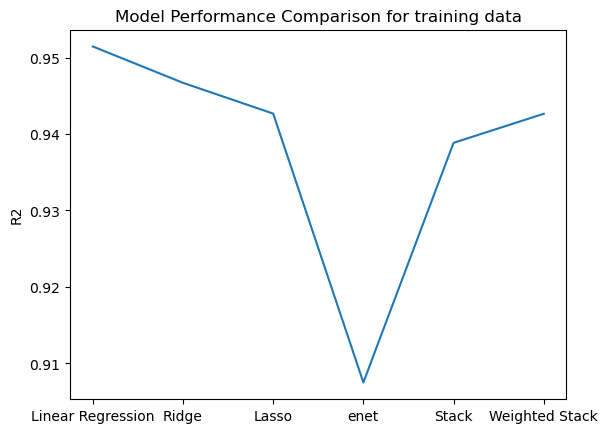

In [105]:
plt.ylabel("R2")
plt.title("Model Performance Comparison for training data")
sns.lineplot(data= trainr2score)

<AxesSubplot:title={'center':'Model Performance Comparison for test data'}, ylabel='R2'>

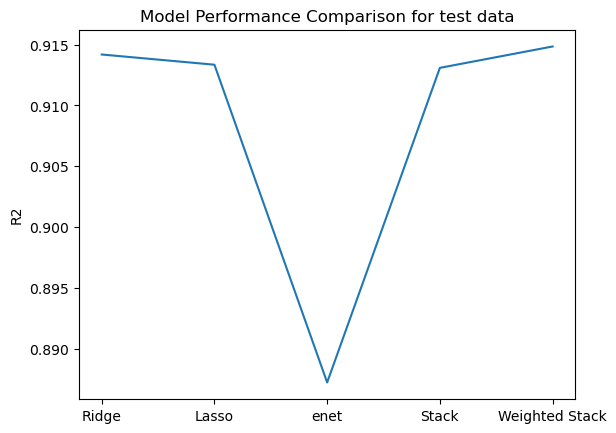

In [106]:
plt.ylabel("R2")
plt.title("Model Performance Comparison for test data")
sns.lineplot(data= testr2score)

## Conclusions

- The project was aimed at giving better price signals for the different type of houses in Ames Iowa. This predicted sale price of houses in Ames Iowa was at 90% accuracy which is considerably good and able to give good guidance for both the buyers and sellers. For the secondary stakeholders, online real estate could adopt this machine learning model to allow sellers to optimally price their houses and could potentially increase their transactions rate and drive more traffic to thier site.
- As for owners of houses that plan to sell their house, the most important feature identified by the models was overall condition of the house. Therefore, in order to get the maximum value for your house, you would want to have a house maintenance every now and then to upkeep it's quality and condition.

### Moving forward
> Some improvements can be done for the models would be to take into account the health of the whole economy where such data could include the inflation rate, unemployment rate and Gross domestic product. The real estate market also depends on interest rates, where in a low interest rate environment, we would usually see higher real estate prices ([*source*](https://www.propwise.sg/how-interest-rates-and-yields-affect-property-prices/.)). 

## Preparing Test data predictions

In [107]:
x_values_test = testdata.drop(columns = ["Id","PID","SalePrice"])

In [108]:
x_values_test = featureeng(x_values_test)
x_values_test = scalingdata(x_values_test)

In [109]:
ypred = stackpredweighted(ridgecv,lassocv,enet_model, x_values_test)

In [110]:
submfile = pd.DataFrame(data = {"Id": testdata["Id"], "SalePrice": ypred})

In [111]:
submfile = submfile.sort_values(by = ['Id'])

In [112]:
submfile

Id      SalePrice
703     2  126327.514548
705     4  278607.877915
119     6  196444.598622
311     7  234712.780021
400    17  213722.501751
..    ...            ...
536  2919   76771.877778
178  2921   84563.698057
828  2922  188104.895277
668  2925  184253.269576
674  2928  128707.048759

[878 rows x 2 columns]

In [113]:
submfile.to_csv("datasets/submission.csv",index = False)